<a href="https://colab.research.google.com/github/preyansh98/comp-551-notebooks/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
np.random.seed(1234)

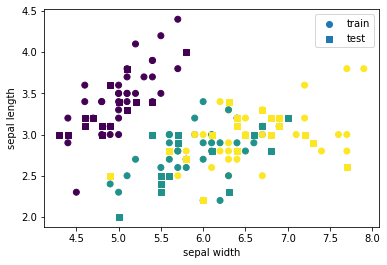

In [32]:
# import dataset

from sklearn import datasets
dataset = datasets.load_iris()

x, y = dataset['data'][:,:2], dataset['target']
N,D = x.shape
inds = np.random.permutation(N)
#train-test split)
x_train, y_train = x[inds[:100]], y[inds[:100]]
x_test, y_test = x[inds[100:]], y[inds[100:]]
#visualization
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.show()

### KNN Classifer

In [33]:
euclidean = lambda x1,x2: np.sqrt(np.sum((x1-x2)**2, axis=-1))
class KNN:

  def __init__(self, K=5, dist_fn=euclidean):
    self.K = K
    self.dist_fn = dist_fn
    return

  def fit(self, x, y):
    self.x = x
    self.y = y
    self.C = np.max(y)+1
    return self

  def predict(self, x_test):
    num_test = x_test.shape[0]
    num_train = self.x.shape[0]

    # form distance matrix. can be done in a simpler way using a for loop
    distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:]) #numtest * num_train matrix

    # form matrix to hold probability of class for each feature
    y_prob = np.zeros((num_test, self.C))

    # form an array to hold knns for each i.
    knns = np.zeros((num_test, self.K), dtype=int)

    for i in range(num_test):
      # for all test numbers first get the k nearest neighbors.
      # we do this by sorting the distances[i] and taking first K. 
      # using argsort to only keep the indices as result.
      knns[i,:] = np.argsort(distances[i])[:self.K]

      # knns[i,:] stores index of closest one (i.e. the test number that is closest)
      # self.y[knns[i,:] will therefore retrieve this label
      # we use bincount to store number of occurence for each C in this array
      y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C)

    # to get probability basically divide each entry by the sum of all probs in the entry
    y_prob /= np.sum(y_prob, 1, keepdims=True)
    return y_prob, knns

## Now fit the model and make a prediction

accuracy is 82.0


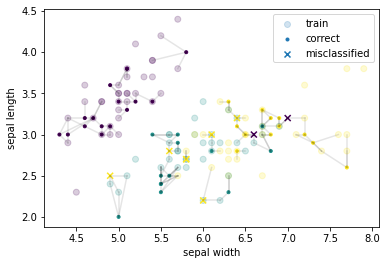

In [34]:
model = KNN(K=3)
y_prob, knns = model.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(y_prob,1)

accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}')

correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(x_test.shape[0]):
    for k in range(model.K):
        hor = x_test[i,0], x_train[knns[i,k],0]
        ver = x_test[i,1], x_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel('sepal length')
plt.xlabel('sepal width')
plt.legend()
plt.show()